# **Hate Speech Detection**

# **Name: Sai Karthik.Batchu**

Data Collection.

    o	Collect the dataset or Create the dataset

•	Data Preprocessing.

    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o	Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test.

•	Model Building

    o	Import the model building Libraries
    o	Initializing the model
    o	Training and testing the model
    o	Evaluation of Model
    o	Save the Model


In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
#importing and reading the dataset
dataset = pd.read_csv("twitter.csv")

In [3]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
#Checking for the null values
dataset.isnull()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
24778,False,False,False,False,False,False,False
24779,False,False,False,False,False,False,False
24780,False,False,False,False,False,False,False
24781,False,False,False,False,False,False,False


In [5]:
#As, we can see there are no null values present in the dataset
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
dataset.isnull().any()

Unnamed: 0            False
count                 False
hate_speech           False
offensive_language    False
neither               False
class                 False
tweet                 False
dtype: bool

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [8]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


Creating a new feature known as "Label"
It checks with respect to class, if the class value is

0 it is Hate Speech

1 it is offensive

2 it is neither offensive nor Hate speech


In [19]:
dataset["labels"]=dataset["class"].map({0:"Hate speech",
                                       1:"Offensive Language",
                                       2:"No hate or offensive language"})

In [20]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,3,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,3,0,1,youu got wild bitches tellin you lies,Offensive Language


In [68]:
data = dataset[["tweet","labels"]]

In [69]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


<Axes: xlabel='labels', ylabel='count'>

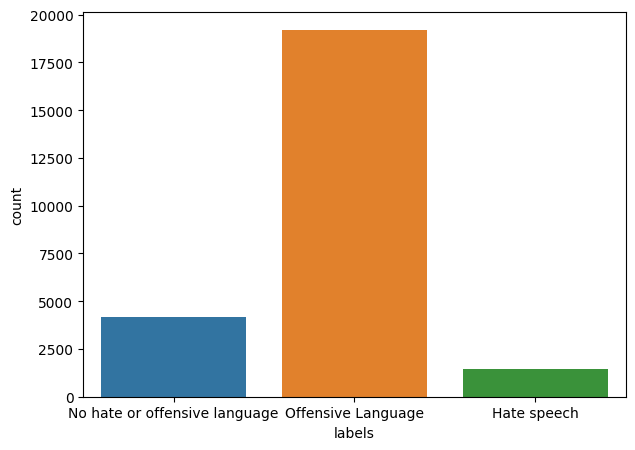

In [73]:
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(7,5))
sns.countplot(x='labels', data = dataset)

Text(0.5, 1.0, 'Distribution of sentiments')

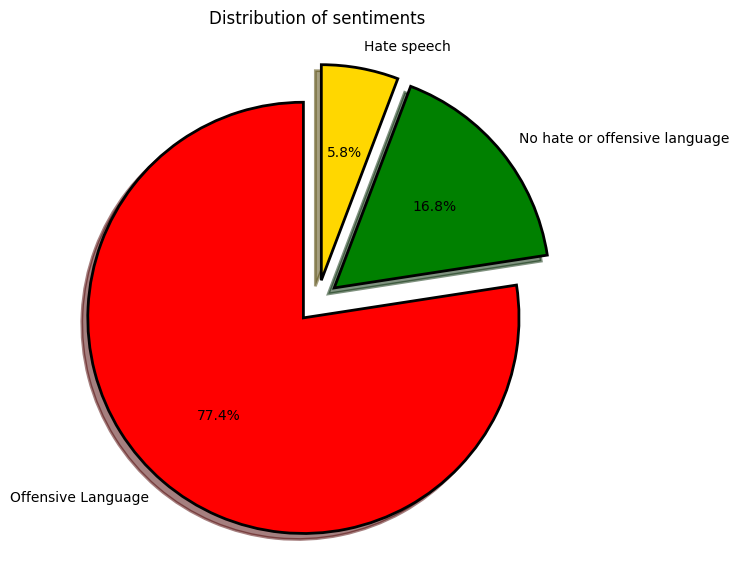

In [67]:
fig = plt.figure(figsize=(7,7))
colors = ("red","green" ,"gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = dataset['labels'].value_counts()
explode = (0.1, 0.1,0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90,wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

<Axes: >

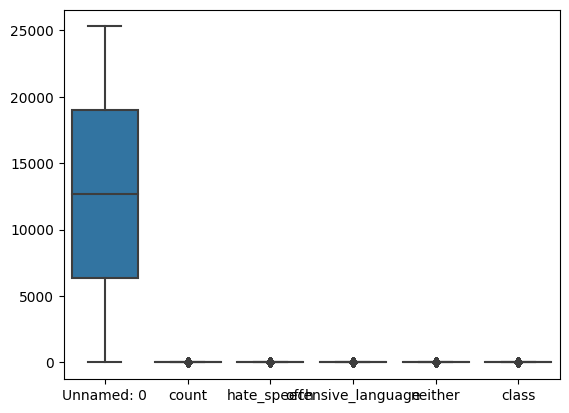

In [70]:
#Outlier detection
sns.boxplot(dataset)

In [71]:
corr=dataset.corr()
corr

<ipython-input-71-f22ca9e9dc13>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class
Unnamed: 0,1.000000,0.023947,-0.054345,0.036966,-0.005187,0.024525
count,0.023947,1.000000,0.101926,0.129049,0.063326,-0.010029
hate_speech,-0.054345,0.101926,1.000000,-0.318854,-0.157599,-0.515732
offensive_language,0.036966,0.129049,-0.318854,1.000000,-0.806336,-0.485655
neither,-0.005187,0.063326,-0.157599,-0.806336,1.000000,0.800687
class,0.024525,-0.010029,-0.515732,-0.485655,0.800687,1.000000


<Axes: >

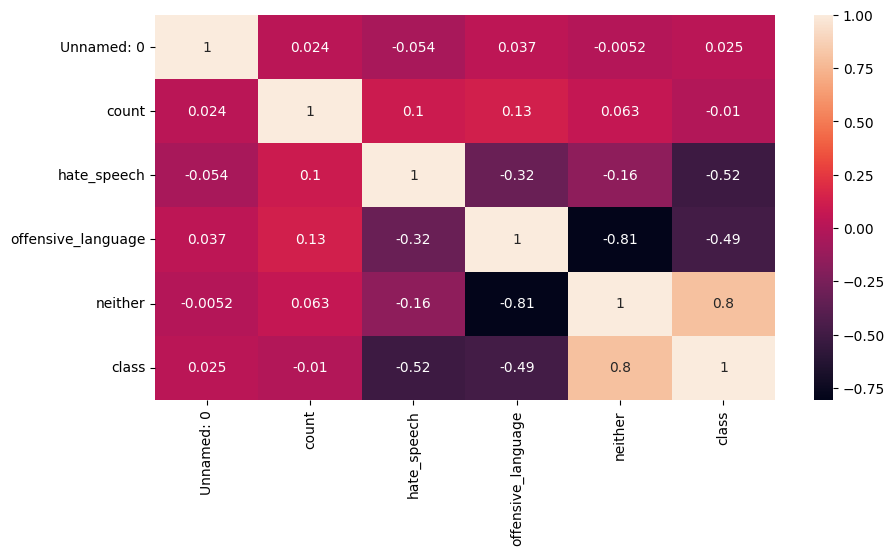

In [72]:
plt.subplots(figsize=(10,5))#length,width
sns.heatmap(corr,annot=True,)

Preprocessing

We have to pre process the Data, for that we need two packages

1. Regular Expression-Get rid of special symbols and numbers

2. Natural Language Toolkit-Removal of stop words and stemming the words

3. String-To remove punctuation

In [23]:
import re
import nltk
import string

In [24]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [25]:
#importing stop words
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [26]:
#import steamming
stemmer = nltk.SnowballStemmer("english")

In [27]:
#Data Cleaning
def clean_data(text):
    text = str(text).lower()
    text = re.sub("https?://\S+www\.S+",'',text)
    text = re.sub('\[*?\]','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' %re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    #Removal of stop words
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    #stemming the text
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [28]:
data["tweet"]= data["tweet"].apply(clean_data)

<ipython-input-28-b6ad30f8beed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]= data["tweet"].apply(clean_data)


In [29]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No hate or offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [30]:
#Creating numeric python array
X=np.array(data["tweet"])
y=np.array(data["labels"])

In [31]:
X

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [32]:
#Feature scaling and splitting into training and testing data
#convert them into vector form
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
#splitting data into traing and testing data
from sklearn.model_selection import train_test_split

In [34]:
#Creating an object, fit and transform
cv=CountVectorizer()
X=cv.fit_transform(X)

In [35]:
X

<24783x26152 sparse matrix of type '<class 'numpy.int64'>'
	with 198309 stored elements in Compressed Sparse Row format>

In [36]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [37]:
X_train

<16604x26152 sparse matrix of type '<class 'numpy.int64'>'
	with 132909 stored elements in Compressed Sparse Row format>

# **Model Building**

# **DecisionTree**

In [38]:
#importing the classifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
#create an object
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = dt.predict(X_test)

In [41]:
#Confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_pred)
cn

array([[ 154,   31,  280],
       [  28, 1086,  265],
       [ 239,  215, 5881]])

<Axes: >

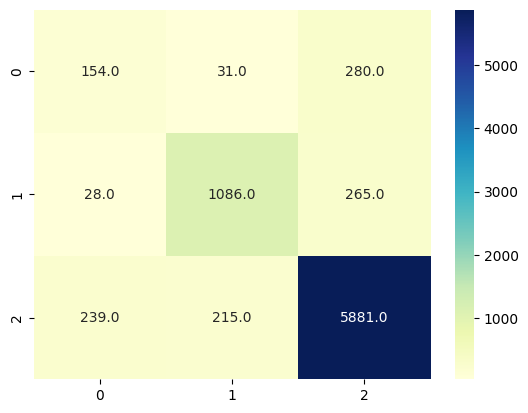

In [42]:
sns.heatmap(cn, annot=True, fmt= ".1f", cmap = "YlGnBu")

In [43]:
#Calculating the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8706443330480499

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


                               precision    recall  f1-score   support

                  Hate speech       0.37      0.33      0.35       465
No hate or offensive language       0.82      0.79      0.80      1379
           Offensive Language       0.92      0.93      0.92      6335

                     accuracy                           0.87      8179
                    macro avg       0.70      0.68      0.69      8179
                 weighted avg       0.87      0.87      0.87      8179



# **Logistic Regression**

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
lr_y_pred = lr.predict(X_test)

In [60]:
lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_cm

array([[ 111,   52,  302],
       [   7, 1178,  194],
       [ 110,  202, 6023]])

In [61]:
# print classification report
print(classification_report(y_test, lr_y_pred))

                               precision    recall  f1-score   support

                  Hate speech       0.49      0.24      0.32       465
No hate or offensive language       0.82      0.85      0.84      1379
           Offensive Language       0.92      0.95      0.94      6335

                     accuracy                           0.89      8179
                    macro avg       0.74      0.68      0.70      8179
                 weighted avg       0.88      0.89      0.89      8179



In [62]:
logreg=accuracy_score(y_test,lr_y_pred)
logreg

0.8939968211272772

Prediction

In [45]:
sample = "Let's unite and kill all the people who are protesting against the government"
sample = clean_data(sample)

In [46]:
sample

'let unit kill peopl protest govern'

In [47]:
data1 = cv.transform([sample]).toarray()

In [48]:
data1

array([[0, 0, 0, ..., 0, 0, 0]])

In [49]:
dt.predict(data1)

array(['Hate speech'], dtype=object)

In [50]:
def Example(message1):
    clean_data(message1)
    data2 = cv.transform([message1]).toarray()
    message_type = dt.predict(data2)
    return message_type

In [51]:
Example("she is a mad girl")

array(['Offensive Language'], dtype=object)

In [56]:
Example("you are nice")

array(['No hate or offensive language'], dtype=object)

In [53]:
Example("I will kill you")

array(['Hate speech'], dtype=object)